In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/EVA/session7/New_app

Mounted at /content/drive
/content/drive/My Drive/EVA/session7/New_app


In [3]:
!pwd

/content/drive/My Drive/EVA/session7/New_app


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import torch
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
import torch.nn.functional as F

In [5]:
from data_augmentation.albumenatiton import albumentations_transforms

In [6]:
from config import ModelConfig
args = ModelConfig()
args.print_config()

args

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout': 0.15,
  'epochs': 50,
  'l1_decay': 3e-06,
  'l2_decay': 0.001,
  'lr': 0.1,
  'max_lr': 0.01,
  'momentum': 0.9,
  'num_workers': 4,
  'seed': 1}


In [ ]:
from data_loader.data_pull_CIFAR10_new import data_pull_CIFAR10

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [7]:
from GradCAM.gradcam import GradCam
from utils.normalize import normalize,denormalize,imshow
from GradCAM.visualize import VisualizeCam
import matplotlib.pyplot as plt

## Import Dataset

Files already downloaded and verified
Files already downloaded and verified
truck  ship plane  ship


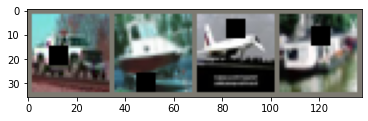

In [ ]:
data = data_pull_CIFAR10(args)

# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

In [ ]:
trainloader=data.train_loader
testloader=data.test_loader
classes=data.classes


In [ ]:
classes

('plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

## Check Summary

In [ ]:
from utils.summary import get_summary
from model.ResNet18 import *

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model=ResNet18(args.dropout).to(device)

In [ ]:
get_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Run the model with 10 epochs

In [ ]:
from trainer import train_test_fit
from torch.optim.lr_scheduler import OneCycleLR


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=0.01, epochs=10,
                     steps_per_epoch=len(trainloader))

In [ ]:
train_losses, train_accs, test_losses, test_accs, misclassified_imgs, correct_imgs  =train_test_fit.fit(model, device, trainloader,testloader,classes,criterion,optimizer,scheduler,epochs=10,l1_decay=0.0, l2_decay=0.0)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.4853394031524658 Batch_id=781 Accuracy=43.54: 100%|██████████| 782/782 [01:42<00:00,  7.65it/s]
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0184, Accuracy: 5805/10000 (58.05%)

EPOCH: 2


Loss=1.15237557888031 Batch_id=781 Accuracy=60.91: 100%|██████████| 782/782 [01:42<00:00,  7.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0157, Accuracy: 6471/10000 (64.71%)

EPOCH: 3


Loss=0.5185290575027466 Batch_id=781 Accuracy=68.53: 100%|██████████| 782/782 [01:42<00:00,  7.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0124, Accuracy: 7254/10000 (72.54%)

EPOCH: 4


Loss=0.7957085371017456 Batch_id=781 Accuracy=73.59: 100%|██████████| 782/782 [01:42<00:00,  7.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0109, Accuracy: 7600/10000 (76.00%)

EPOCH: 5


Loss=0.7895798683166504 Batch_id=781 Accuracy=77.00: 100%|██████████| 782/782 [01:42<00:00,  7.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0100, Accuracy: 7859/10000 (78.59%)

EPOCH: 6


Loss=1.057041049003601 Batch_id=781 Accuracy=79.38: 100%|██████████| 782/782 [01:42<00:00,  7.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0095, Accuracy: 7951/10000 (79.51%)

EPOCH: 7


Loss=0.6977560520172119 Batch_id=781 Accuracy=81.46: 100%|██████████| 782/782 [01:42<00:00,  7.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0092, Accuracy: 8006/10000 (80.06%)

EPOCH: 8


Loss=0.8632263541221619 Batch_id=781 Accuracy=83.04: 100%|██████████| 782/782 [01:42<00:00,  7.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 8125/10000 (81.25%)

EPOCH: 9


Loss=0.5421338081359863 Batch_id=781 Accuracy=84.11: 100%|██████████| 782/782 [01:42<00:00,  7.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0086, Accuracy: 8146/10000 (81.46%)

EPOCH: 10


Loss=0.22506387531757355 Batch_id=781 Accuracy=85.69: 100%|██████████| 782/782 [01:42<00:00,  7.66it/s]
/content/drive/My Drive/EVA/session7/New_app/trainer/train_test_fit.py:87: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  misclassified_inds = (is_correct == 0).nonzero()[:, 0]


Test set: Average loss: 0.0080, Accuracy: 8302/10000 (83.02%)



# Plots

In [ ]:
from GradCAM.gradcam import GradCam
from utils.normalize import *
from GradCAM.visualize import VisualizeCam

In [ ]:
from utils.plots import plot_graph,plot_images

## Test Loss Curve

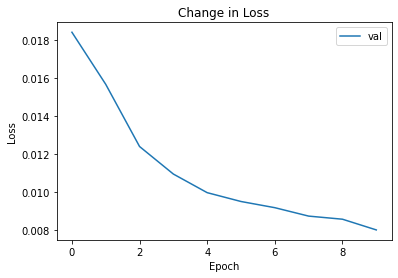

In [ ]:
plt_data = {"val": test_losses}
plot_graph(plt_data, "Loss")

## Train Accuracy Curve

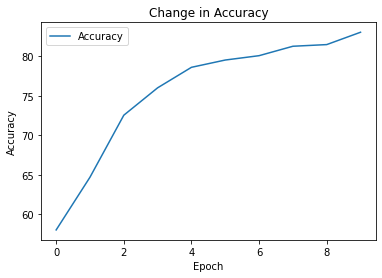

In [ ]:
plt_data = {"Accuracy": test_accs}
plot_graph(plt_data, "Accuracy")

## Train and Test Accuracy Curve

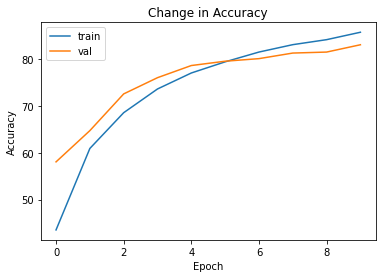

In [ ]:
plt_data = {
    "train": train_accs,
    "val": test_accs
}
plot_graph(plt_data, "Accuracy")

## Correctly Classified images

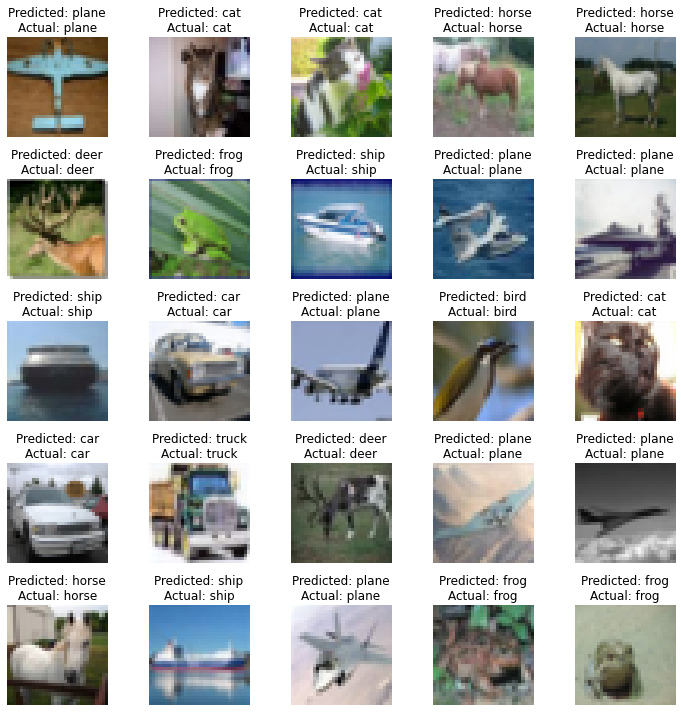

In [ ]:
plot_images(correct_imgs, classes, "correct_imgs.png")

## Mis-Classified images

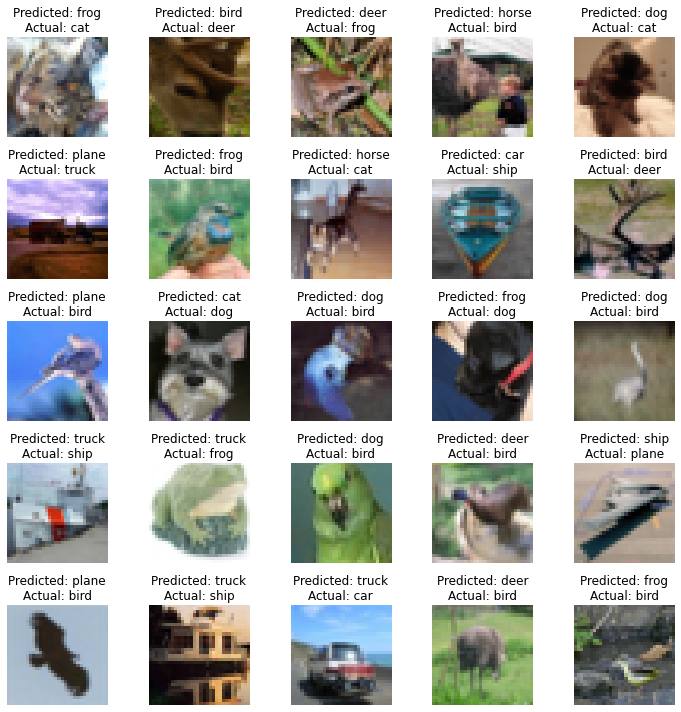

In [ ]:
plot_images(misclassified_imgs, classes, "misclassified_imgs.png")

## GradCAM for correctly classified images

In [ ]:
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(model,classes, target_layers)

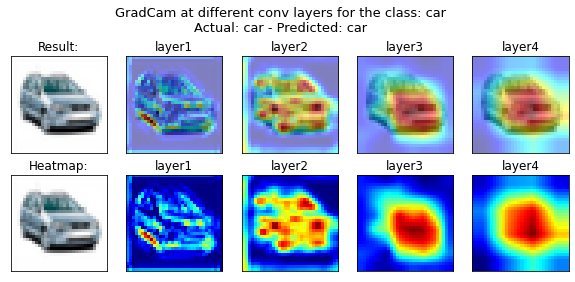

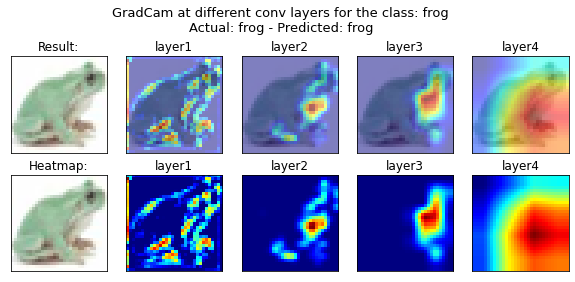

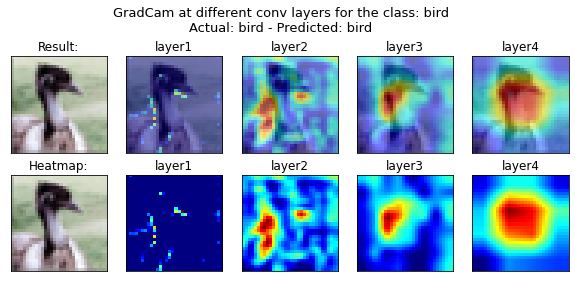

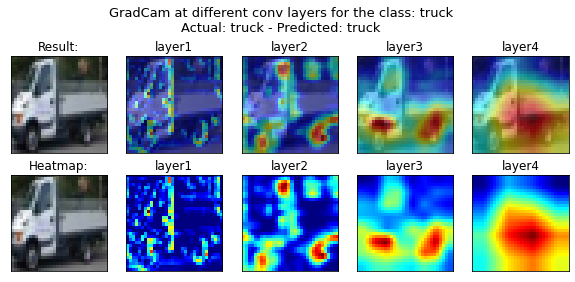

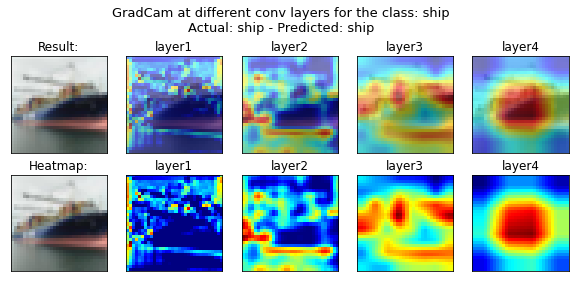

In [ ]:
num_img = 5
correct_pred_imgs = []
truth_inds = []
for i in range(num_img):
  correct_pred_imgs.append(torch.as_tensor(correct_imgs[i]["img"]))
  truth_inds.append(correct_imgs[i]["target"])
viz_cam(torch.stack(correct_pred_imgs),truth_inds, target_layers, metric="correct")